In [2]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score
from mord import LogisticIT
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')

### Problem statement 
Based on the dataset designed with certain frequent words in email, how accurate the model is able to classify the unforeseen dataset. 

In [3]:
mail = pd.read_csv("spambase_csv.csv")
mail.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
mail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [5]:
mail.describe().T

,count,mean,std,min,25%,50%,75%,max
word_freq_make,4601.0,0.104553,0.305358,0.0,0.000,0.000,0.000,4.540
word_freq_address,4601.0,0.213015,1.290575,0.0,0.000,0.000,0.000,14.280
word_freq_all,4601.0,0.280656,0.504143,0.0,0.000,0.000,0.420,5.100
word_freq_3d,4601.0,0.065425,1.395151,0.0,0.000,0.000,0.000,42.810
word_freq_our,4601.0,0.312223,0.672513,0.0,0.000,0.000,0.380,10.000
word_freq_over,4601.0,0.095901,0.273824,0.0,0.000,0.000,0.000,5.880
word_freq_remove,4601.0,0.114208,0.391441,0.0,0.000,0.000,0.000,7.270
word_freq_internet,4601.0,0.105295,0.401071,0.0,0.000,0.000,0.000,11.110
word_freq_order,4601.0,0.090067,0.278616,0.0,0.000,0.000,0.000,5.260
word_freq_mail,4601.0,0.239413,0.644755,0.0,0.000,0.000,0.160,18.180


In [6]:
mail.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

<AxesSubplot:>

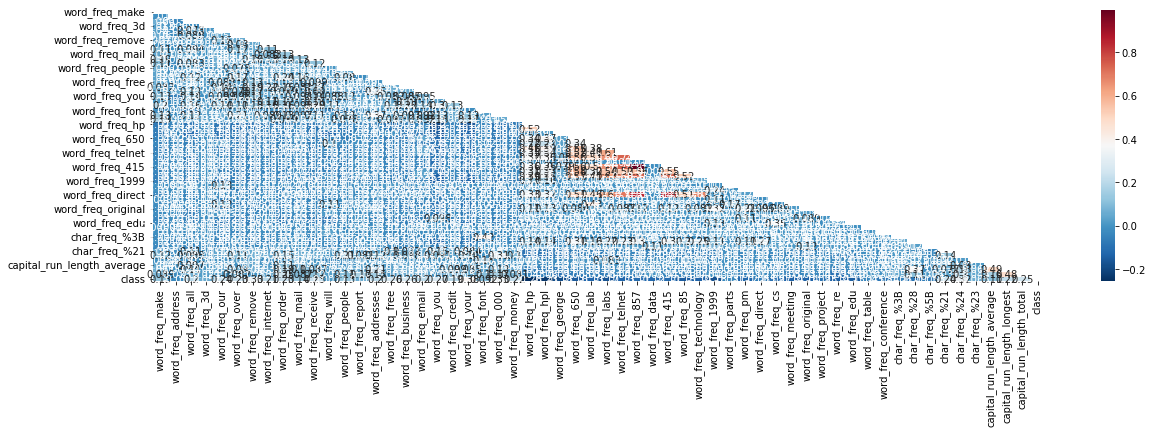

In [7]:
mask = np.zeros_like(mail.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,5))
sns.heatmap(mail.corr(),cmap='RdBu_r',mask=mask, annot=True)

### Correlation among features
It is very difficult to identify the correlation among features, to make it easier sort the value in descending order.
Based on the ouput, there is no high correlation among the features so it is safe to fed all the variables into the model.

In [8]:
correlation = abs(mail.corr()["class"].sort_index()).reset_index().rename(columns= {"index":"feature"})
correlation.sort_values("class", ascending = False)

,feature,class
9,class,1.000000
57,word_freq_your,0.383234
10,word_freq_000,0.334787
50,word_freq_remove,0.332117
5,char_freq_%24,0.323629
56,word_freq_you,0.273651
29,word_freq_free,0.263215
20,word_freq_business,0.263204
31,word_freq_hp,0.256723
2,capital_run_length_total,0.249164


In [9]:
y = mail['class']
X = mail.drop(columns=['class'])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, stratify=y, random_state=0
)

### Principal Component Analysis
As there are 57 variables in the dataset, to optimize the calculation of the model we can try to cover the variance into lesser variables using PCA.
Initally let's take as 7 pca components to cover the variance of 57 variables.

In [14]:
pcs = PCA(n_components=7)
pcs.fit(mail)

PCA(n_components=7)

### PCA analysis 
Based on the percentage of the variance, we can conclude that PC1 and pc2 is alone enough to cover 99.8% of variance so let us train mode using only this 2 features.

In [15]:
pcs = PCA(n_components=7)
pcs.fit(mail)
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                              'Proportion of variance': pcs.explained_variance_ratio_,
                              'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Standard deviation,614.0078,169.9763,27.3827,3.3792,2.0423,1.6208,1.3956
Proportion of variance,0.9270,0.0710,0.0018,0.0000,0.0000,0.0000,0.0000
Cumulative proportion,0.9270,0.9981,0.9999,0.9999,1.0000,1.0000,1.0000


In [16]:
pca_model = PCA(n_components=2)
pca_model.fit(X_train)
X_train = pca_model.transform(X_train)
X_test = pca_model.transform(X_test)

print(X_train.shape)

(2300, 2)


### KNN classification
Based on pca compents train the knn model to find the optimum k value and it comes out to be 5

In [12]:
#finding optimal value of k
k=0
M=-1
for i in range (1,10):
    ModelK=KNeighborsClassifier(n_neighbors=i)
    ModelK.fit(X_train,y_train)
    S=ModelK.score(X_test,y_test)
    if S>M:
        M=S
        k=i
print(k)

5


In [13]:
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train) 

y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

# accuracy
classificationSummary(y_train, y_train_pred) 
print()
classificationSummary(y_test, y_test_pred)
print()

Confusion Matrix (Accuracy 0.8230)

       Prediction
Actual    0    1
     0 1213  181
     1  226  680

Confusion Matrix (Accuracy 0.7501)

       Prediction
Actual    0    1
     0 1133  261
     1  314  593



### Analysis
Based on the accuracy it is safe to use this model for further classification, though error 1 and error 2 in confusion matrix is not showing promosing result.